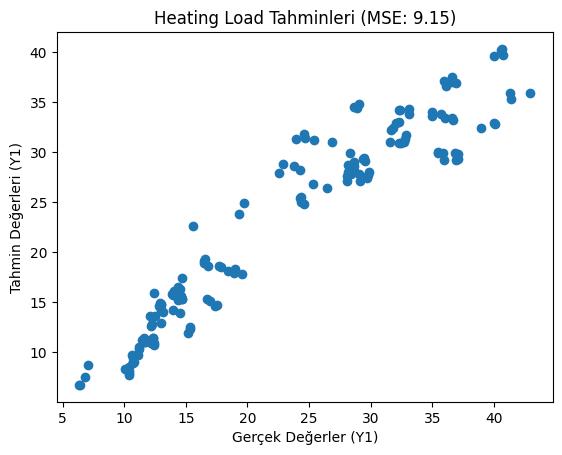

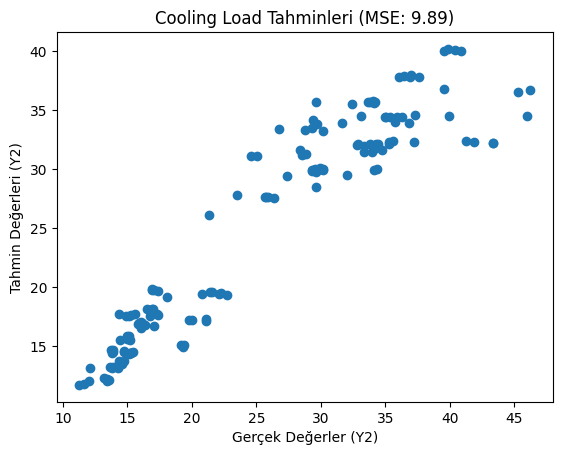

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def evaluate_model():
    """
    Evaluate the performance of a linear regression model for predicting heating load and cooling load.

    This function reads the processed data from a CSV file, splits it into training and testing sets,
    trains two separate linear regression models for predicting heating load and cooling load,
    and evaluates the models using mean squared error (MSE).

    Returns:
    - mse_y1 (float): Mean squared error for the heating load predictions.
    - mse_y2 (float): Mean squared error for the cooling load predictions.
    """

    data_path = '../data/processed/ENB2012_data_processed.csv'
    data = pd.read_csv(data_path)

    X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
    y1 = data['Y1']  # Heating Load
    y2 = data['Y2']  # Cooling Load

    X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
    X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

    model_y1 = LinearRegression()
    model_y1.fit(X_train, y1_train)
    model_y2 = LinearRegression()
    model_y2.fit(X_train, y2_train)

    y1_pred = model_y1.predict(X_test)
    mse_y1 = mean_squared_error(y1_test, y1_pred)

    y2_pred = model_y2.predict(X_test)
    mse_y2 = mean_squared_error(y2_test, y2_pred)

    plt.scatter(y1_test, y1_pred)
    plt.xlabel('Actual Values (Y1)')
    plt.ylabel('Estimated Values (Y1)')
    plt.title(f'Heating Load Estimates (MSE: {mse_y1:.2f})')
    plt.show()

    plt.scatter(y2_test, y2_pred)
    plt.xlabel('Actual Values (Y2)')
    plt.ylabel('Estimated Values (Y2)')
    plt.title(f'Cooling Load Estimates (MSE: {mse_y2:.2f})')
    plt.show()

    return mse_y1, mse_y2

mse_y1, mse_y2 = evaluate_model()
